# COMPLEX MODELS AND KERAS - MUNICH, ALL YEARS

## Table of Contents

1. Import Libraries
2. Load Data
3. Wrangle Data
4. Reshape Data
5. Split Data
6. Build Random Forest Model
7. Feature Importance Analysis
8. Evaluate Model and Insights


### 1. IMPORT LIBRARIES

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from numpy import unique
from numpy import reshape
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling1D, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### 2. LOAD DATA

In [2]:
# Define path for where data is stored
path = r'C:\Users\Administrator\Documents\data analytics\Machine Learning\ClimateWins\Data Sets'

In [3]:
# Read in the Answers data.
answers = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [4]:
# Read the unscaled data (which I want to use in this exercise).
data = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'))

In [5]:
# Check the climate data (df data)
data.head(3)

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9


In [6]:
# Check the shape of the data set
data.shape

(22950, 170)

In [7]:
answers.head(3)

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
# Check the answers shape
answers.shape

(22950, 16)

In [9]:
answers = answers.loc[data.index]

In [10]:
print(list(answers.columns))

['DATE', 'BASEL_pleasant_weather', 'BELGRADE_pleasant_weather', 'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather', 'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather', 'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather', 'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather', 'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather', 'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather', 'VALENTIA_pleasant_weather']


In [11]:
print(list(data.columns))

['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max', 'BELGRADE_cloud_cover', 'BELGRADE_humidity', 'BELGRADE_pressure', 'BELGRADE_global_radiation', 'BELGRADE_precipitation', 'BELGRADE_sunshine', 'BELGRADE_temp_mean', 'BELGRADE_temp_min', 'BELGRADE_temp_max', 'BUDAPEST_cloud_cover', 'BUDAPEST_humidity', 'BUDAPEST_pressure', 'BUDAPEST_global_radiation', 'BUDAPEST_precipitation', 'BUDAPEST_sunshine', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max', 'DEBILT_cloud_cover', 'DEBILT_wind_speed', 'DEBILT_humidity', 'DEBILT_pressure', 'DEBILT_global_radiation', 'DEBILT_precipitation', 'DEBILT_sunshine', 'DEBILT_temp_mean', 'DEBILT_temp_min', 'DEBILT_temp_max', 'DUSSELDORF_cloud_cover', 'DUSSELDORF_wind_speed', 'DUSSELDORF_humidity', 'DUSSELDORF_pressure', 'DUSSELDORF_global_radiation', 'DUSSELDORF_pr

### 3. DATA WRANGLING, clean and prepare data for deep learning. Remove unnecessary columns etc.

In [12]:
# Filter the climate data for only weather station Maastricht
# Keep only columns with Dusseldorf in the naming

# Case-insensitive filter for columns containing "Munchen"
munchen_cols = data.columns[data.columns.str.contains("MUNCHENB_", case=False)]

# Select only these columns
data = data[munchen_cols]


In [13]:
data.head(3)

,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max
0,5,0.67,0.20,0.1,0,0.0,6.9,1.1,10.4
1,6,0.72,0.61,0.3,0,5.1,6.2,4.2,10.2
2,6,0.91,0.20,0.3,0,0.0,5.8,4.0,8.0


In [14]:
data.shape

(22950, 9)

In [15]:
# Filter the answers data for only predictions for Maastricht
# Keep only columns with Maastricht in the naming

# Case-insensitive filter for columns containing "Düsseldorf"
munchen_cols = answers.columns[answers.columns.str.contains("MUNCHENB_", case=False)]

# Select only these columns
answers = answers[munchen_cols]


In [16]:
answers.shape

(22950, 1)

In [17]:
# Check data shape
data.shape

(22950, 9)

In [18]:
# Check answers shape
answers.shape

(22950, 1)

In [19]:
# Define all observation types
observation_types = [
    'cloud_cover', 'wind_speed', 'humidity', 'pressure',
    'global_radiation', 'precipitation', 'snow_depth',
    'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [25]:
# Check shape
data.shape

(22950, 8)

In [26]:
# Detect missing columns
# Get current station names. No missing columns in Dusseldorf.
stations = set([col.split('_')[0] for col in data.columns])

# Define expected observation types
observation_types = ['cloud_cover', 'humidity', 'pressure', 'global_radiation', 
                     'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']

# Build all expected column names
expected_columns = set()
for station in stations:
    for obs in observation_types:
        expected_columns.add(f'{station}_{obs}')

# Compare with actual columns
actual_columns = set(data.columns)

# Find which columns are missing
missing_columns = expected_columns - actual_columns
print("Missing columns:")
for col in sorted(missing_columns):
    print(col)

Missing columns:
MUNCHENB_pressure


In [27]:
# Confirm that no missing columns remain
print("Missing columns after filling:")
remaining_missing = expected_columns - set(data.columns)
print(remaining_missing)  # Should be an empty set

# Also check for NaN values
print("Top missing values by column:")
print(data.isnull().sum().sort_values(ascending=False).head(10))

Missing columns after filling:
{'MUNCHENB_pressure'}
Top missing values by column:
MUNCHENB_cloud_cover         0
MUNCHENB_humidity            0
MUNCHENB_global_radiation    0
MUNCHENB_precipitation       0
MUNCHENB_sunshine            0
MUNCHENB_temp_mean           0
MUNCHENB_temp_min            0
MUNCHENB_temp_max            0
dtype: int64


In [28]:
# Check the data shape
data.shape

(22950, 8)

In [29]:
# Check the answers shape
answers.shape

(22950, 1)

In [30]:
print(list(answers.columns))

['MUNCHENB_pleasant_weather']


In [32]:
# Export cleaned dataset
data.to_csv(os.path.join(path, 'weather_munchen.csv'), index=False)

### 4. RESHAPE DATA in order to be able to use it as an input in the models. 

In [33]:
# Load cleaned data into X
x = pd.read_csv(os.path.join(path, 'weather_munchen.csv'), index_col=False)

# Load your labels
y = answers

In [34]:
# Check x
x.head(3)

,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max
0,5,0.67,0.20,0.1,0.0,6.9,1.1,10.4
1,6,0.72,0.61,0.3,5.1,6.2,4.2,10.2
2,6,0.91,0.20,0.3,0.0,5.8,4.0,8.0


In [35]:
# Confirm the current shapes
print("x shape (before reshaping):", x.shape)
print("y shape:", y.shape)

x shape (before reshaping): (22950, 8)
y shape: (22950, 1)


In [36]:
# Reshape data to 2D
print("Feature matrix shape (x):", x.shape)  # Should print (3652, 135)
print("Target variable shape (y):", y.shape)  # Should print (3652,)

Feature matrix shape (x): (22950, 8)
Target variable shape (y): (22950, 1)


In [37]:
# Confirm the final shape 
print("Final x shape:", x.shape)  # should be (22950, 15, 9)
print("Final y shape:", y.shape)  # should be (22950, 15)

Final x shape: (22950, 8)
Final y shape: (22950, 1)


In [38]:
# Confirm x
x

,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max
0,5,0.67,0.20,0.10,0.0,6.9,1.1,10.4
1,6,0.72,0.61,0.30,5.1,6.2,4.2,10.2
2,6,0.91,0.20,0.30,0.0,5.8,4.0,8.0
3,6,0.90,0.20,0.01,0.0,3.9,3.2,5.4
4,5,0.85,0.65,0.96,5.6,1.8,-3.0,6.0
...,...,...,...,...,...,...,...,...
22945,2,0.76,1.37,0.26,9.7,14.3,8.3,22.2
22946,6,0.70,1.37,0.26,7.7,16.1,8.9,26.1
22947,7,0.64,1.37,0.26,6.8,17.4,11.2,26.2
22948,6,0.75,1.37,0.26,8.3,14.5,9.2,23.5


### 5. SPLIT DATA

In [39]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [40]:
# Check shapes
print("Training set:", x_train.shape, y_train.shape)
print("Testing set:", x_test.shape, y_test.shape)

Training set: (17212, 8) (17212, 1)
Testing set: (5738, 8) (5738, 1)


In [41]:
# Check shapes
print("Training set:", x_train.shape, y_train.shape)
print("Testing set:", x_test.shape, y_test.shape)

Training set: (17212, 8) (17212, 1)
Testing set: (5738, 8) (5738, 1)


In [52]:
# 1️⃣ Convert data to float32 to save memory
# ------------------------------
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# ------------------------------
# 2️⃣ Initialize Random Forest with memory optimizations
# ------------------------------
clf = RandomForestClassifier(
    n_estimators=50,      # fewer trees → less memory
    max_depth=10,         # limit tree depth
    max_samples=1.0,      # train each tree on 50% of samples
    n_jobs=-1,            # use all CPU cores efficiently
    random_state=42
)

# ------------------------------
# 3️⃣ Train the model
# ------------------------------
clf.fit(x_train, y_train)

# ------------------------------
# 4️⃣ Make predictions
# ------------------------------
y_pred = clf.predict(x_test)

# ------------------------------
# 5️⃣ Evaluate accuracy
# ------------------------------
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy on Test Set:", round(accuracy * 100, 2), "%")


Random Forest Accuracy on Test Set: 100.0 %


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


### 6. BUILD RANDOM FOREST MODEL

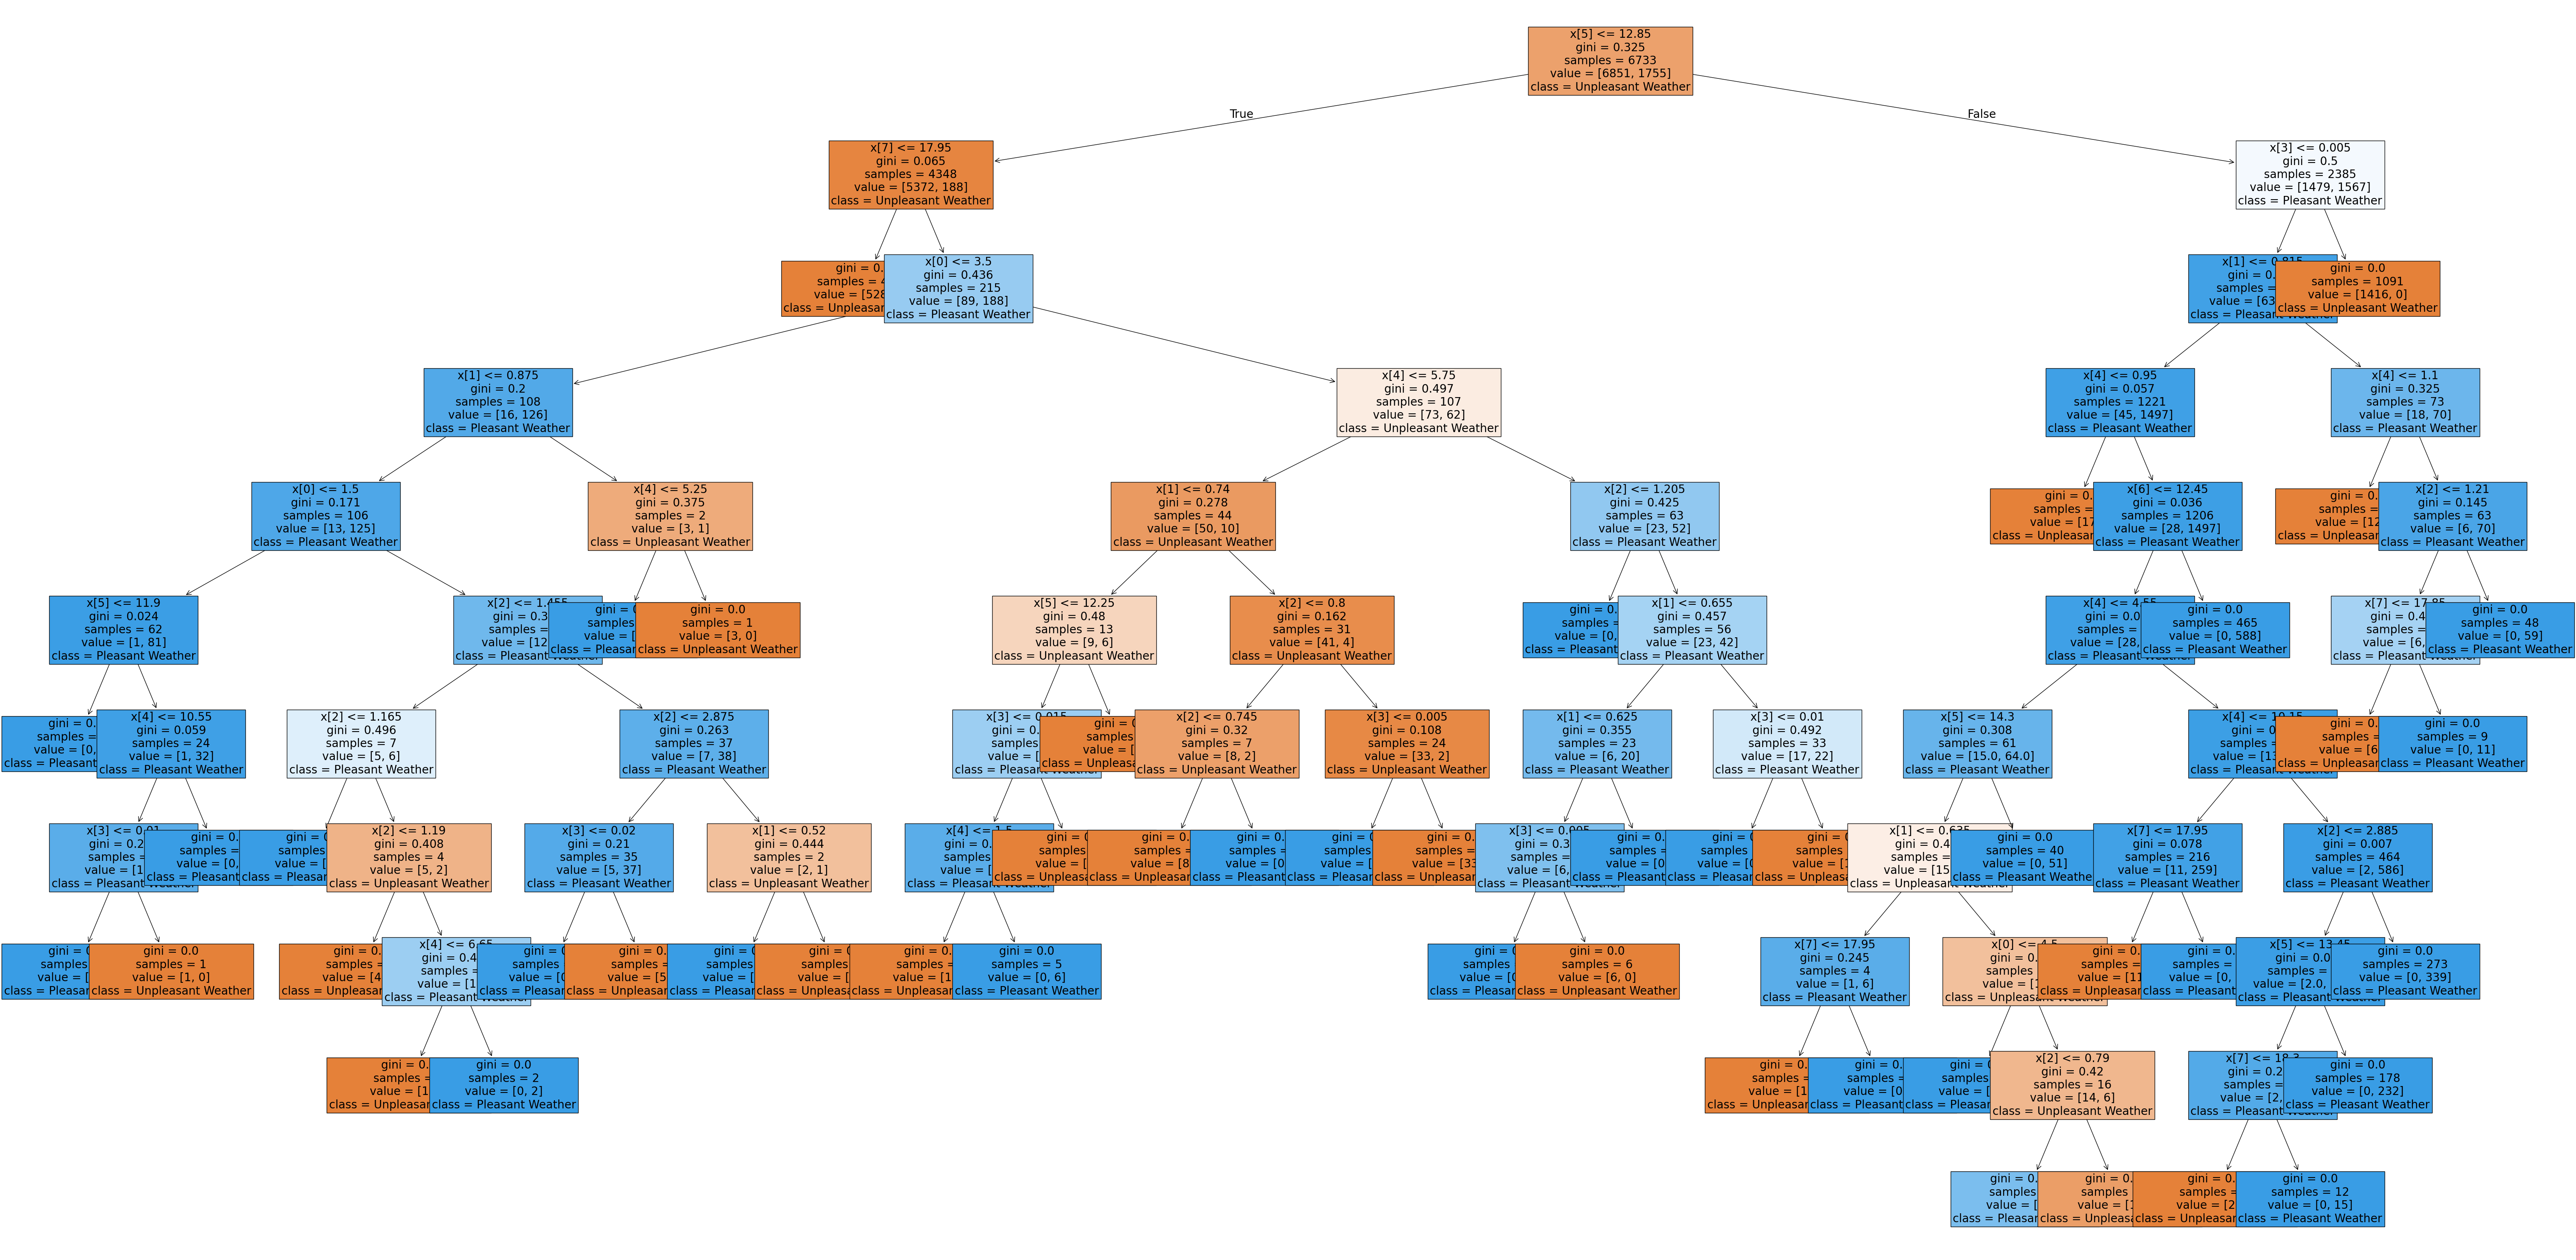

In [43]:
# Define class names for readability
class_names = ['Unpleasant Weather', 'Pleasant Weather']

# Plot the tree
fig = plt.figure(figsize=(80, 40))
plot_tree(clf.estimators_[15], 
          filled=True, 
          fontsize=20,
          feature_names=None,  # You can add your feature names here if you'd like
          class_names=class_names);  # Adds class labels at the leaves

In [44]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (17212, 8)
x_test shape: (5738, 8)
y_train shape: (17212, 1)
y_test shape: (5738, 1)


In [45]:
print("Unique classes in y_train:", set(y_train))
print("Unique classes in y_test:", set(y_test))

Unique classes in y_train: {'MUNCHENB_pleasant_weather'}
Unique classes in y_test: {'MUNCHENB_pleasant_weather'}


In [46]:
print(x_train.dtypes)

MUNCHENB_cloud_cover         float32
MUNCHENB_humidity            float32
MUNCHENB_global_radiation    float32
MUNCHENB_precipitation       float32
MUNCHENB_sunshine            float32
MUNCHENB_temp_mean           float32
MUNCHENB_temp_min            float32
MUNCHENB_temp_max            float32
dtype: object


### 7. FEATURE IMPORTANCE ANALYSIS

In [47]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape) # Should print: (9,)
newarray # This shows the raw importance values

(8,)


array([0.03550368, 0.01392252, 0.09061232, 0.36729406, 0.08347038,
       0.15435615, 0.02404064, 0.23080026])

In [49]:
# Clean feature names from Dusseldorf columns

Munchen_features = [feature.replace('MUNCHENB', '') for feature in x]
Munchen_features

['_cloud_cover',
 '_humidity',
 '_global_radiation',
 '_precipitation',
 '_sunshine',
 '_temp_mean',
 '_temp_min',
 '_temp_max']

In [50]:
# Create Series for feature importance

important = pd.Series(newarray, index=Maastricht_features).sort_values(ascending=False)
important

MUNCHENB_precipitation       0.367294
MUNCHENB_temp_max            0.230800
MUNCHENB_temp_mean           0.154356
MUNCHENB_global_radiation    0.090612
MUNCHENB_sunshine            0.083470
MUNCHENB_cloud_cover         0.035504
MUNCHENB_temp_min            0.024041
MUNCHENB_humidity            0.013923
dtype: float64

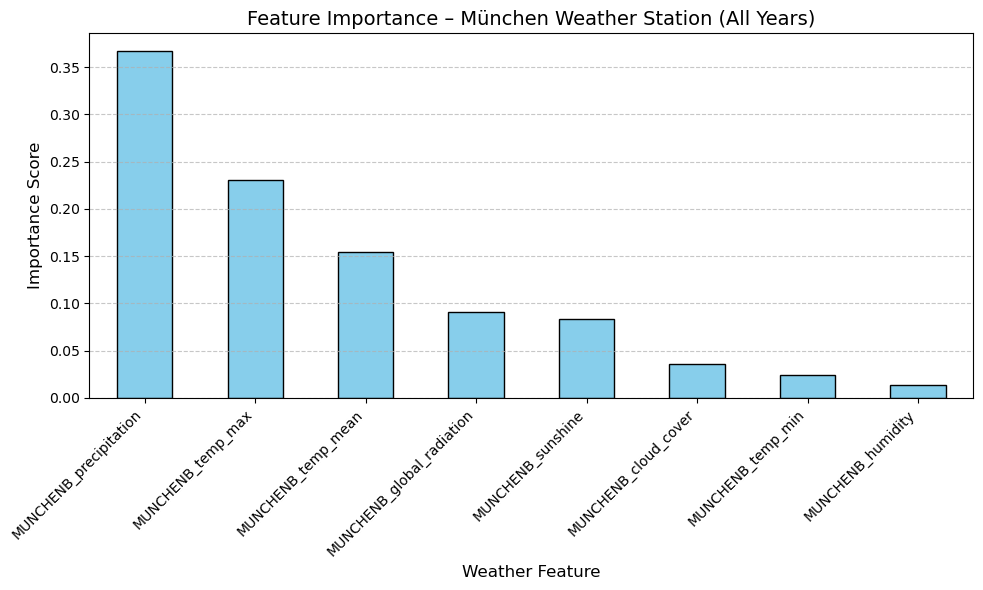

In [51]:
# Plot feature importance

plt.figure(figsize=(10, 6))
important.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Feature Importance – München Weather Station (All Years)', fontsize=14)
plt.xlabel('Weather Feature', fontsize=12)
plt.ylabel('Importance Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### 8. EVALUATION OF MODEL AND INSIGHTS

The test accuracy was 100 % when filtering data for one city only. This makes sense because all the data for one city could fit into the analysis, since the prediction is only for that city in this case.  

When running the importance score it is clear that precipitation data trained the model the most, appr. 37 %, while pressure data gave the least contribution to the model (0,01, 1  %). This probably depends on real data that was measured since the accuracy above was 100 %. 


